In [10]:
import random
import matplotlib.pyplot as plt

In [11]:
def generate_message():
    return "".join([str(random.randint(0, 1)) for _ in range(4)])


message = generate_message()
print("Generated Message:", message)

Generated Message: 0011


In [12]:
def hamming_74_encode(data):
    if len(data) != 4:
        raise ValueError("Input data must be 4 bits long")
    encoded = ""

    p1 = str(int(data[0]) ^ int(data[1]) ^ int(data[2]))
    p2 = str(int(data[0]) ^ int(data[2]) ^ int(data[3]))
    p4 = str(int(data[1]) ^ int(data[2]) ^ int(data[3]))

    encoded += p1
    encoded += p2
    encoded += data[0]
    encoded += p4
    encoded += data[1]
    encoded += data[2]
    encoded += data[3]

    return encoded


encoded_message = hamming_74_encode(message)
print("Original Data:", message)
print("Encoded Message:", encoded_message)

Original Data: 0011
Encoded Message: 1000011


In [13]:
def errors(encoded_message, prob_of_error):
    new_message = ""
    for i in range(7):
        if random.random() < prob_of_error:
            if encoded_message[i] == "0":
                new_message += "1"
            else:
                new_message += "0"
        else:
            new_message += encoded_message[i]
    return new_message


message_with_errors = errors(encoded_message, 0.2)
print("Generated Messages:", message)
print("Encoded Message:", encoded_message)
print("Message with errors:", message_with_errors)

Generated Messages: 0011
Encoded Message: 1000011
Message with errors: 1001111


In [14]:
def clear_from_parity_bits(encoded_message, message_with_errors):
    clear_encoded_mes = ""
    clear_mes_with_errors = ""
    for i in range(0, len(message_with_errors)):
        if i not in [0, 1, 3]:
            clear_encoded_mes += encoded_message[i]
            clear_mes_with_errors += message_with_errors[i]
    return clear_encoded_mes, clear_mes_with_errors

print(clear_from_parity_bits(encoded_message, message_with_errors))

('0011', '0111')


In [15]:
def hamming_74_decode(encoded):
    if len(encoded) != 7:
        raise ValueError("Encoded data must be 7 bits long")

    H = [[1, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, 1]]

    encoded_bits = [int(bit) for bit in encoded]

    syndrome = [sum(encoded_bits[j] * H[i][j] for j in range(7)) % 2 for i in range(3)]

    error_pos = sum(syndrome[i] * (2**i) for i in range(3))

    if error_pos != 0:
        encoded_bits[error_pos - 1] = 1 - encoded_bits[error_pos - 1]

    decoded_data = [encoded_bits[i] for i in [2, 4, 5, 6]]

    decoded = "".join(map(str, decoded_data))

    return decoded


encoded_message = "0001111"
decoded_data = hamming_74_decode(encoded_message)
print("Encoded Message:", encoded_message)
print("Decoded Data:", decoded_data)

Encoded Message: 0001111
Decoded Data: 0111


In [16]:
list_of_messages_1000 = [generate_message() for _ in range(1000)]
list_of_messages_10000 = [generate_message() for _ in range(10000)]
list_of_messages_100000 = [generate_message() for _ in range(100000)]


list_of_messages_encoded_1000 = [
    hamming_74_encode(message) for message in list_of_messages_1000
]
list_of_messages_encoded_10000 = [
    hamming_74_encode(message) for message in list_of_messages_10000
]
list_of_messages_encoded_100000 = [
    hamming_74_encode(message) for message in list_of_messages_100000
]

error_prob = 0.3

list_of_messages_with_errors_1000 = [
    errors(message, error_prob) for message in list_of_messages_encoded_1000
]
list_of_messages_with_errors_10000 = [
    errors(message, error_prob) for message in list_of_messages_encoded_10000
]
list_of_messages_with_errors_100000 = [
    errors(message, error_prob) for message in list_of_messages_encoded_100000
]


list_of_messages_decode_1000 = [
    hamming_74_decode(message) for message in list_of_messages_with_errors_1000
]
list_of_messages_decode_10000 = [
    hamming_74_decode(message) for message in list_of_messages_with_errors_10000
]
list_of_messages_decode_100000 = [
    hamming_74_decode(message) for message in list_of_messages_with_errors_100000
]

print("Generated Messages:", list_of_messages_1000[:10])
print("Generated encoded Messages:", list_of_messages_encoded_1000[:10])
print("Generated Messages with errors:", list_of_messages_with_errors_1000[:10])
print("Generated decoded Messages:", list_of_messages_decode_1000[:10])
print("_________________________________________________________________")

print("Generated Messages:", list_of_messages_10000[:10])
print("Generated encoded Messages:", list_of_messages_encoded_10000[:10])
print("Generated Messages with errors:", list_of_messages_with_errors_10000[:10])
print("Generated decoded Messages:", list_of_messages_decode_10000[:10])
print("_________________________________________________________________")

print("Generated Messages:", list_of_messages_100000[:10])
print("Generated encoded Messages:", list_of_messages_encoded_100000[:10])
print("Generated Messages with errors:", list_of_messages_with_errors_100000[:10])
print("Generated decoded Messages:", list_of_messages_decode_100000[:10])
print("_________________________________________________________________")

Generated Messages: ['1011', '1101', '1111', '0000', '1101', '0001', '0011', '1010', '1011', '0001']
Generated encoded Messages: ['0110011', '0010101', '1111111', '0000000', '0010101', '0101001', '1000011', '0011010', '0110011', '0101001']
Generated Messages with errors: ['0100111', '1100101', '1110010', '0001000', '0010001', '0111010', '1110110', '1110110', '0101010', '0100001']
Generated decoded Messages: ['0101', '0101', '1000', '0000', '1001', '0010', '0110', '0110', '0010', '0101']
_________________________________________________________________
Generated Messages: ['0100', '0000', '0100', '0110', '1000', '1001', '0000', '1010', '1010', '1110']
Generated encoded Messages: ['1001100', '0000000', '1001100', '0100110', '1110000', '1011001', '0000000', '0011010', '0011010', '1010110']
Generated Messages with errors: ['1011011', '0010101', '1000100', '0000100', '1001000', '0001011', '1000010', '0111010', '0010001', '1010110']
Generated decoded Messages: ['1010', '1101', '0100', '0000'

In [17]:
def count_errors(original_messages, decoded_messages):
    corrected_errors = [0] * 5
    for i in range(len(original_messages)):
        number_of_errors = 0
        for j in range(len(original_messages[i])):
            if original_messages[i][j] != decoded_messages[i][j]:
                number_of_errors += 1
        corrected_errors[number_of_errors] += 1
    return corrected_errors

# print(list_of_messages_100000, list_of_messages_decode_10000)
print(
    count_errors(list_of_messages_10000, list_of_messages_decode_10000)
)

[2653, 2749, 3079, 1458, 61]


[2653, 2749, 3079, 1458, 61]


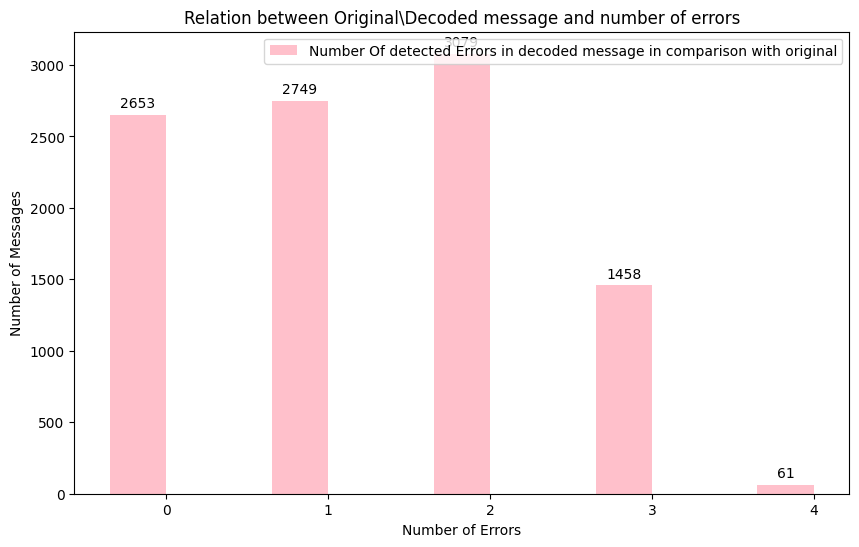

In [28]:
import numpy as np
import matplotlib.pyplot as plt

errors_count = list(range(8))
corrected_counts = []


corrected_counts = count_errors(list_of_messages_10000, list_of_messages_decode_10000)
print(corrected_counts)

x = np.arange(len(corrected_counts))

width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(
    x - width / 2,
    corrected_counts,
    width,
    label="Number Of detected Errors in decoded message in comparison with original",
    color="pink",
)

ax.set_xlabel("Number of Errors")
ax.set_ylabel("Number of Messages")
ax.set_title("Relation between Original\Decoded message and number of errors")
ax.set_xticks(x)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(rects1)

plt.show()

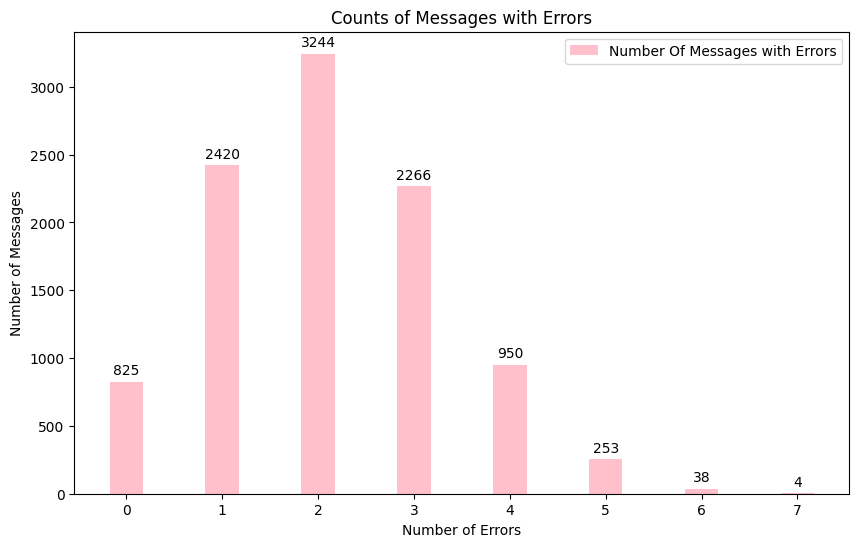

In [31]:
import numpy as np
import matplotlib.pyplot as plt

errors_counts = [0] * (
    8
) 

for encoded_message, message_with_errors in zip(
    list_of_messages_encoded_10000, list_of_messages_with_errors_10000
):
    errors_count = 0
    for i in range(len(message_with_errors)):
        if message_with_errors[i] != encoded_message[i]:
            errors_count += 1
    errors_counts[errors_count] += 1

x = np.arange(len(errors_counts))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(
    x,
    errors_counts,
    width,
    label="Number Of Messages with Errors",
    color="pink",
)

ax.set_xlabel("Number of Errors")
ax.set_ylabel("Number of Messages")
ax.set_title("Counts of Messages with Errors")
ax.set_xticks(x)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(rects1)

plt.show()